# Some Fun Visualisations of the Tracked Marine Heatwaves

In [1]:
import xarray as xr
import numpy as np
import dask
from getpass import getuser
from pathlib import Path

import spot_the_blOb.helper as hpc
from spot_the_blOb.plotter import specify_grid, PlotConfig

In [2]:
# Start Dask Cluster
client = hpc.StartLocalCluster(n_workers=32, n_threads=1)

Memory per Worker: 7.86 GB


/home/b/b382615/opt/anaconda3/lib/python3.10/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39231 instead
  warnings.warn(


Hostname is  l30603
Forward Port = l30603:39231
Dashboard Link: localhost:39231/status


In [3]:
# Directories
scratch_dir = Path('/scratch') / getuser()[0] / getuser()

fpath_ckdtree = scratch_dir / 'grid_files' / 'ckdtree' / 'rectgrids'
MHW_dataset = scratch_dir / 'mhws' / 'MHWs_tracked_unstruct.zarr'

In [4]:
# Define the Structure of the Unstructured Grid
specify_grid(grid_type='unstructured', fpath_ckdtree=fpath_ckdtree)

In [5]:
# Import Tracked MHW DataSet
blobs_ds = xr.open_zarr(str(MHW_dataset), chunks={})
blobs_ds

<xarray.Dataset> Size: 8GB
Dimensions:       (ID: 112, time: 128, ncells: 14886338, component: 2,
                   sibling_ID: 10)
Coordinates:
  * ID            (ID) int32 448B 1 2 3 4 5 6 7 ... 106 107 108 109 110 111 112
    lat           (ncells) float64 119MB dask.array<chunksize=(14886338,), meta=np.ndarray>
    lon           (ncells) float64 119MB dask.array<chunksize=(14886338,), meta=np.ndarray>
  * time          (time) datetime64[ns] 1kB 2002-04-11T23:59:00 ... 2002-08-1...
Dimensions without coordinates: ncells, component, sibling_ID
Data variables:
    ID_field      (time, ncells) int32 8GB dask.array<chunksize=(2, 465199), meta=np.ndarray>
    area          (time, ID) float32 57kB dask.array<chunksize=(128, 112), meta=np.ndarray>
    centroid      (component, time, ID) float32 115kB dask.array<chunksize=(2, 128, 112), meta=np.ndarray>
    global_ID     (time, ID) int32 57kB dask.array<chunksize=(128, 112), meta=np.ndarray>
    merge_ledger  (time, ID, sibling_ID) int32 573kB dask.array<chunksize=(64, 112, 10), meta=np.ndarray>
    presence      (time, ID) bool 14kB dask.array<chunksize=(128, 112), meta=np.ndarray>
    time_end      (ID) datetime64[ns] 896B dask.array<chunksize=(112,), meta=np.ndarray>
    time_start    (ID) datetime64[ns] 896B dask.array<chunksize=(112,), meta=np.ndarray>
Attributes: (12/13)
    N_blobs_final:               112
    N_blobs_prefiltered:         7137
    R_fill:                      32
    T_fill:                      2
    accepted_area_fraction:      0.785646228203346
    allow_merging:               1
    ...                          ...
    area_threshold (cells):      19067.600000000002
    multi_parent_merges:         14
    nn_partitioning:             1
    overlap_threshold:           0.5
    preprocessed_area_fraction:  0.7908875002768747
    total_merges:                114

In [6]:
# Extract the MHW ID Field
blobs = blobs_ds.ID_field
blobs

<xarray.DataArray 'ID_field' (time: 128, ncells: 14886338)> Size: 8GB
dask.array<open_dataset-ID_field, shape=(128, 14886338), dtype=int32, chunksize=(2, 465199), chunktype=numpy.ndarray>
Coordinates:
    lat      (ncells) float64 119MB dask.array<chunksize=(14886338,), meta=np.ndarray>
    lon      (ncells) float64 119MB dask.array<chunksize=(14886338,), meta=np.ndarray>
  * time     (time) datetime64[ns] 1kB 2002-04-11T23:59:00 ... 2002-08-16T23:...
Dimensions without coordinates: ncells

(<Figure size 1800x600 with 6 Axes>,
 array([<GeoAxes: title={'center': '2002-04-21'}>,
        <GeoAxes: title={'center': '2002-04-22'}>,
        <GeoAxes: title={'center': '2002-04-23'}>,
        <GeoAxes: title={'center': '2002-04-24'}>,
        <GeoAxes: title={'center': '2002-04-25'}>,
        <GeoAxes: title={'center': '2002-04-26'}>], dtype=object))

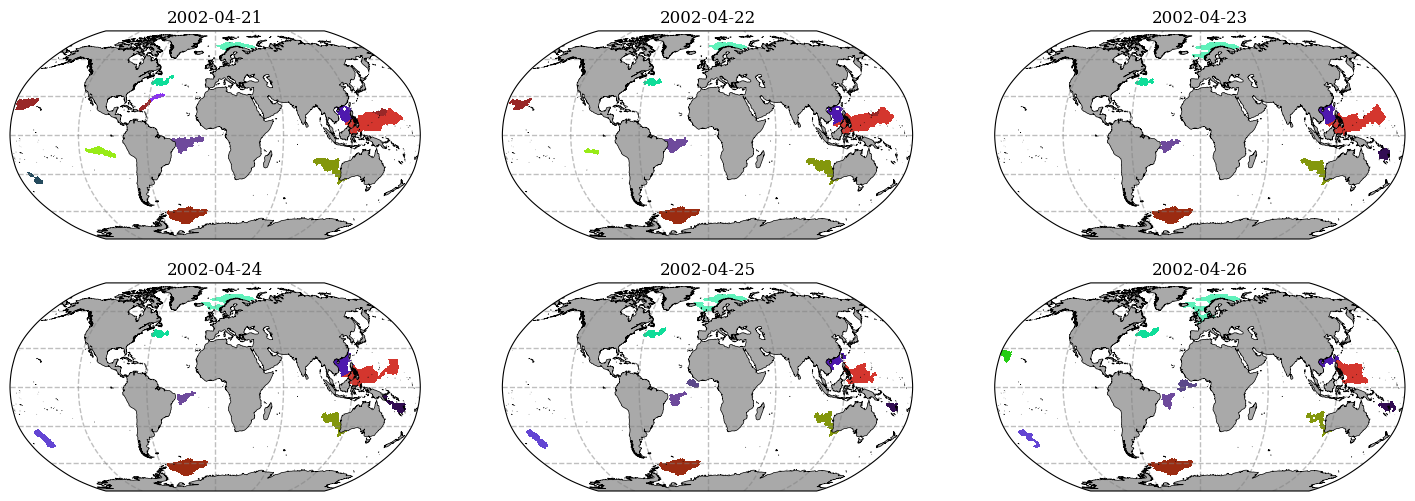

In [7]:
data = blobs.isel(time=slice(10,16))
data = data.where(data>0)

config = PlotConfig(plot_IDs=True)
data.xplot.multi_plot(config, col='time', col_wrap=3)

In [8]:
data = blobs
data = data.where(data>0)

plot_dir = Path('/scratch') / getuser()[0] / getuser() / 'mhws' / 'plots'

config = PlotConfig(plot_IDs=True)
data.xplot.animate(config, plot_dir=plot_dir)

/home/b/b382615/opt/anaconda3/lib/python3.10/site-packages/distributed/client.py:3371: UserWarning: Sending large graph of size 14.20 GiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 13.3.0 (conda-forge gcc 13.3.0-1)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1734145030793/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1734145030793/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_173414503079

'/scratch/b/b382615/mhws/plots/movie_ID_field.mp4'

## Make a Nice Blobby Movie
N.B.: Making `dask`-powered movies using `pplot_mov()` cannot be threaded !

In [ ]:
plot_dir = Path('/scratch') / getuser()[0] / getuser() / 'mhws' / 'plots'
time_slice = slice('2024-01-01', '2026-01-01')

In [ ]:
blobs_subset = blobs.sel(time=time_slice)
blobs_subset = blobs_subset.where(blobs_subset > 0)
blobs_subset.plotter.pplot_mov(plot_dir=plot_dir, plot_IDs=True)

In [ ]:
%%HTML
<video width="640" height="480" controls>
    <source src="./plots/movie_ID_field.mp4" type="video/mp4">
    Your browser does not support the video tag.
</video>

## Plot Consecutive Days of Blobby Shapes

In [ ]:
blobbys = blobs.sel(time=slice('2025-01-01', '2025-01-06'))
blobbys = blobbys.where(blobbys>0) 
fig, ax = blobbys.plotter.pplot_col(plot_IDs=True, col_wrap=3, show_colorbar=False)

## Plot some Blobby Shapes (1 Each Month)

In [ ]:
blobs_day1 = blobs.sel(time=slice('2025-01-01', '2025-12-31')).resample(time='MS').first()
blobs_day1 = blobs_day1.where(blobs_day1>0)
fig, ax = blobs_day1.plotter.pplot_col(plot_IDs=True, col_wrap=3, show_colorbar=False)


## Global Blob Frequency

In [ ]:
event_frequency = (blobs > 0).astype(float).mean('time')
fig, ax = event_frequency.plotter.pplot(var_units='MHW Frequency', cmap='hot_r', cperc=[0,96])

## Find & Plot a Few of the Longest Events

In [ ]:
events_duration = blobs_ds.time_end - blobs_ds.time_start
longest_events = events_duration.sortby(events_duration, ascending=False).ID

for ID in longest_events[:10].values:
    print(f"ID: {ID:<6}   Start Day: {blobs_ds.time_start.sel(ID=ID).dt.strftime('%Y-%m-%d').values}  -->  Duration: {events_duration.sel(ID=ID).dt.days.values:<4} days")

In [ ]:
long_blobs = blobs == (longest_events[:9]).chunk({'ID':1})
long_blobs_local_duration = (long_blobs > 0).sum('time')

fig, ax = long_blobs_local_duration.plotter.pplot_col(col='ID', col_wrap=3, var_units='Duration (days)', cmap='hot_r', cperc=[0, 100])

## Time-Series Plot of Events Area

In [ ]:
events_areas = blobs_ds.area * 1.0e5/16.0 # km^2 (very rough estimate, since "area" here is in units of 0.25x0.25 degree grid cells...)

area_mean = events_areas.mean('ID').resample(time='ME').mean()

area_10 = events_areas.reduce(np.nanpercentile, q=10, dim='ID').resample(time='ME').mean()
area_90 = events_areas.reduce(np.nanpercentile, q=90, dim='ID').resample(time='ME').mean()

plt.figure(figsize=(15, 6))
area_mean.plot(label='Mean Area', color='k', lw=2)
plt.fill_between(area_mean.time.values, area_10, area_90, alpha=0.5)
#plt.yscale('log')
plt.ylim([0, 8e7])
plt.ylabel('Rough Event Area [km^2]')


## Hovmüller Plot of MHW Monthly Frequency vs Latitude

In [ ]:
spatial_presence = (blobs > 0).mean(dim='lon').resample(time='ME').mean()

fig, ax = plt.subplots(figsize=(15, 6))
im = spatial_presence.plot(ax=ax, cmap='hot', x='time',
    cbar_kwargs={
        'label': 'MHW Presence Frequency',
        'extend': 'both'})

ax.set_xlabel('Time')
ax.set_ylabel('Latitude')
ax.grid(True, linestyle='--', alpha=0.6)


## Seasonal Cycle of MHW vs Latitude

In [ ]:
spatial_presence_seasonal = (blobs > 0).mean(dim='lon').groupby('time.dayofyear').mean()

fig, ax = plt.subplots(figsize=(15, 6))
im = spatial_presence_seasonal.plot(ax=ax, cmap='hot', x='dayofyear',
    cbar_kwargs={
        'label': 'MHW Seasonal Frequency',
        'extend': 'both'})

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days_per_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
month_positions = np.cumsum([0] + days_per_month[:-1]) + 15

ax.set_xticks(month_positions)
ax.set_xticklabels(months)
ax.set_xlabel('Month')
ax.set_ylabel('Latitude')
ax.grid(True, linestyle='--', alpha=0.6)
